In [1]:
%reset -f
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Filtro de Wiener

O que está escrito nesta imagem abaixo?

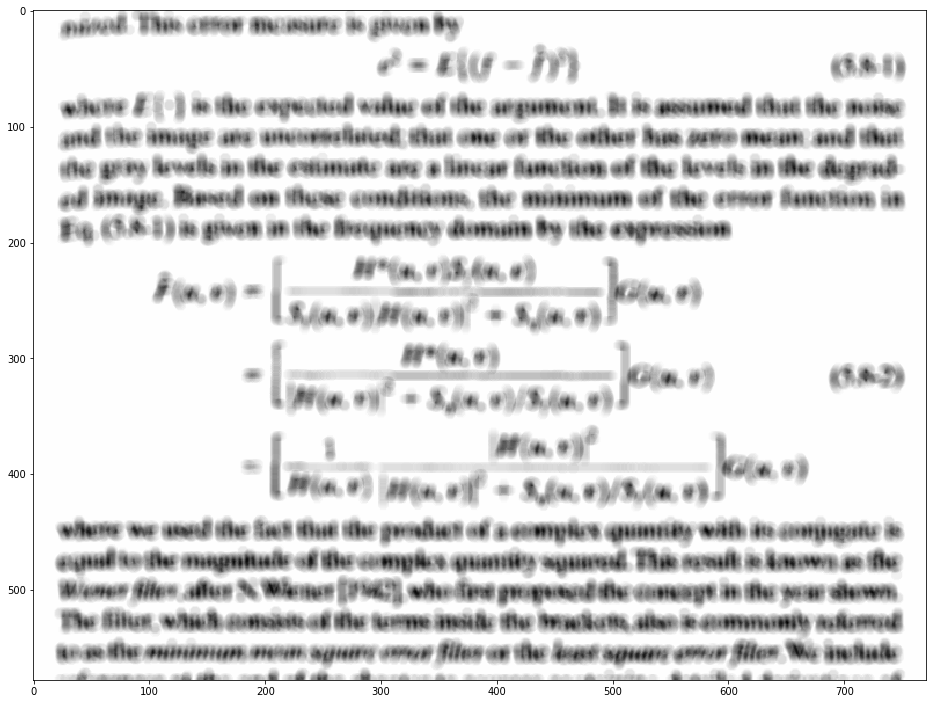

In [2]:
img_blur = cv2.cvtColor(cv2.imread('blur.png'), cv2.COLOR_BGR2GRAY) / 255.0
plt.figure(figsize=(16, 16))
plt.imshow(img_blur, cmap='gray')
plt.show()

Nossa tarefa é tentar reverter esse borramento todo. Na aula passada vimos que o borramento é uma operação de **convolução**:

- Vamos chamar a imagem não-borrada de $f[i,j]$

- Vamos chamar a imagem borrada de $g[i,j]$

- O borramento é uma convolução: deve existir um *kernel* $h[i,j]$ tal que

$$g[i,j] = h[i,j] * f[i,j]$$

## Borramento

Como uma imagem fica fora de foco? O processo de "desfocar" faz com que um pontinho luminoso na imagem original vire um borrãozinho uniforme circular na imagem desfocada. É como se estivéssemos convoluindo a imagem do pontinho com um *kernel* de disco uniforme. Vamos ilustrar isso:

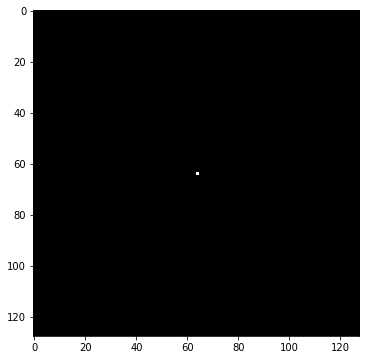

In [3]:
# Fazendo uma imagem de pontinho isolado.
img_test_pontinho = np.zeros((128, 128))
rows, cols = img_test_pontinho.shape
img_test_pontinho[(rows + 1)//2, (cols + 1)//2] = 1.0

plt.figure(figsize=(6, 6))
plt.imshow(img_test_pontinho, cmap='gray');

Agora vamos fazer um *kernel* em forma de disco. Outro nome para *kernel* de convolução é "função de espalhamento pontual" (em inglês "point spread function" - PSF):

In [4]:
# Para fazer um disco, vou usar o np.meshgrid - mais mágica de Numpy!
coord_i = np.arange(-11, 12)
coord_j = np.arange(-11, 12)
J, I = np.meshgrid(coord_j, coord_i)

In [5]:
print(coord_j.shape)
print(coord_j)
print(coord_i)

(23,)
[-11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6
   7   8   9  10  11]
[-11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6
   7   8   9  10  11]


In [6]:
print(J.shape)
print(J[:5, :5])
print(I[:5, :5])

(23, 23)
[[-11 -10  -9  -8  -7]
 [-11 -10  -9  -8  -7]
 [-11 -10  -9  -8  -7]
 [-11 -10  -9  -8  -7]
 [-11 -10  -9  -8  -7]]
[[-11 -11 -11 -11 -11]
 [-10 -10 -10 -10 -10]
 [ -9  -9  -9  -9  -9]
 [ -8  -8  -8  -8  -8]
 [ -7  -7  -7  -7  -7]]


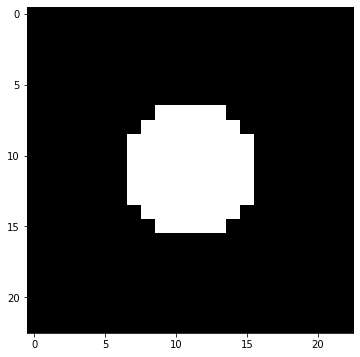

In [7]:
# Agora ficou simples fazer o disco:
raio = 5
img_disco = (I**2 + J**2) < raio**2
img_disco = img_disco / img_disco.sum()

plt.figure(figsize=(6, 6))
plt.imshow(img_disco, cmap='gray');

Vamos encapsular toda essa atividade de fazer disco em uma função, para uso futuro:

A intensidade máxima deste disco é 0.014492753623188406


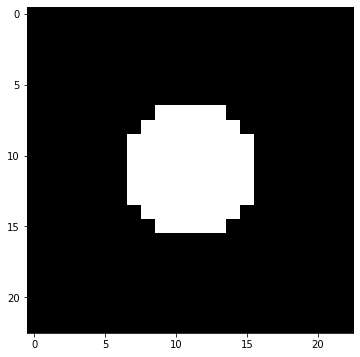

In [8]:
def make_disk(shape, radius):
    rows, cols = shape
    min_j = -(cols - 1)//2
    min_i = -(rows - 1)//2
    coord_j = np.arange(min_j, min_j + cols)
    coord_i = np.arange(min_i, min_i + rows)
    J, I = np.meshgrid(coord_j, coord_i)
    kernel = (I**2 + J**2) < radius**2
    kernel = kernel / kernel.sum()
    return kernel

img_disco = make_disk((23, 23), 5)
plt.figure(figsize=(6, 6))
plt.imshow(img_disco, cmap='gray');
print('A intensidade máxima deste disco é {}'.format(img_disco.max()))

Agora vamos simular o borramento:

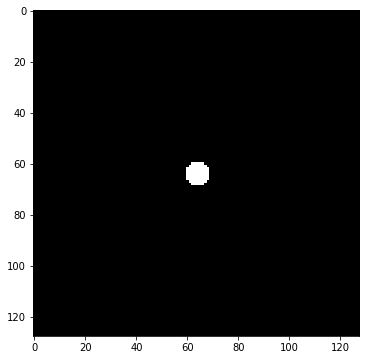

In [9]:
img_test_pontinho_blur = cv2.filter2D(img_test_pontinho, -1, img_disco)

plt.figure(figsize=(6, 6))
plt.imshow(img_test_pontinho_blur, cmap='gray');

### Vamos pensar um pouco

- Um pontinho na coordenada $(128, 128)$ de intensidade $1.0$ virou um disco de intensidade $D$ (neste caso específico $D = 0.0145$) centrado em $(128, 128)$. Um pontinho de intensidade $5.0$ na coordenada $(30, 40)$ resultaria no que?

**Resposta**

- Escreva a expressão matemática correspondente à imagem descrita por "um pontinho na coordenada $(128, 128)$ de intensidade $1.0$".

Dica: um pontinho na origem de intensidade $A$ corresponde à expressão $f[i,j] = A \cdot \delta[i, j]$

**Resposta**

- Se tivéssemos dois pontinhos na imagem, um em $(50, 60)$ com intensidade $3.0$ e outro em $(52, 61)$ com intensidade $4.0$, como fica a imagem borrada? 

Dica: $h*(f_1 + f_2) = h*f_1 + h*f_2$ (as coordenadas $[i,j]$ foram omitidas para maior clareza).

**Resposta**

- Repetindo a questão anterior com mais Matemática: se a imagem dos pontinhos é 

$$f(x,y) = 3 \cdot \delta[x-50, y-60] + 4 \cdot \delta[x-52, y-61]$$

e a imagem do disco é $h[i,j]$, use as propriedades da convolução para escrever a expressão da imagem borrada.

Dica: se $h[i,j]$ é a imagem do disco na origem, então $h[i - i_0, j - j_0]$ é a imagem do disco deslocada para $[i_0, j_0]$.

**Resposta**

Vamos praticar com a seguinte imagem de teste:

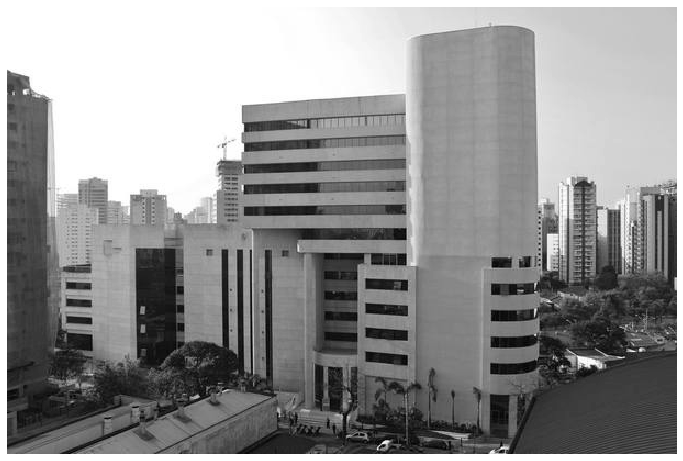

In [10]:
img_test = cv2.cvtColor(cv2.imread('predio.png'), cv2.COLOR_BGR2GRAY) / 255.0
plt.figure(figsize=(12, 12))
plt.imshow(img_test, cmap='gray')
plt.axis('off')
plt.show()

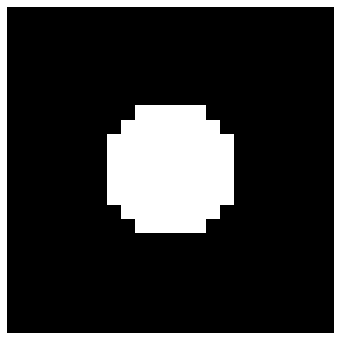

In [11]:
img_disco = make_disk((23, 23), 5)

plt.figure(figsize=(6,6))
plt.imshow(img_disco, cmap='gray')
plt.axis('off')
plt.show()

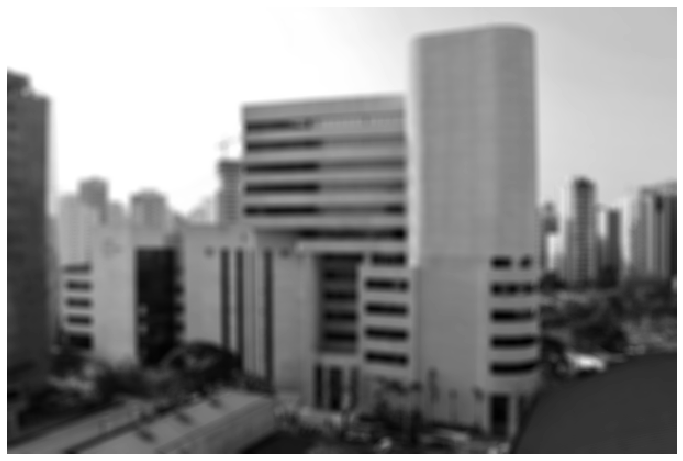

In [12]:
img_test_blur = cv2.filter2D(img_test, -1, img_disco)

plt.figure(figsize=(12,12))
plt.imshow(img_test_blur, cmap='gray')
plt.axis('off')
plt.show()

In [13]:
def display_mag_freq(img_freq):
    img_freq_aux_mag = np.abs(img_freq)
    img_freq_aux_mag[0,0] = 0.0
    img_freq_aux_mag_display = np.log10(1 + np.fft.fftshift(img_freq_aux_mag))
    plt.figure(figsize=(12,12))
    plt.imshow(img_freq_aux_mag_display, cmap='gray')
    plt.axis('off')
    plt.show()

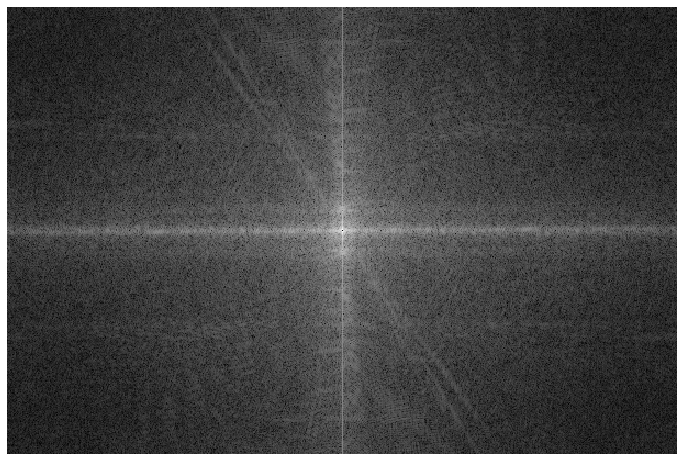

In [14]:
img_test_freq = np.fft.fft2(img_test)

display_mag_freq(img_test_freq)

# Convolução versus produto em frequência

Vimos na aula passada que 

- a convolução de duas funções no espaço 

- é equivalente ao produto das transformadas de Fourier destas funções na frequência

Para ilustrar, vamos calcular o borramento da imagem de teste usando a transformada de Fourier:

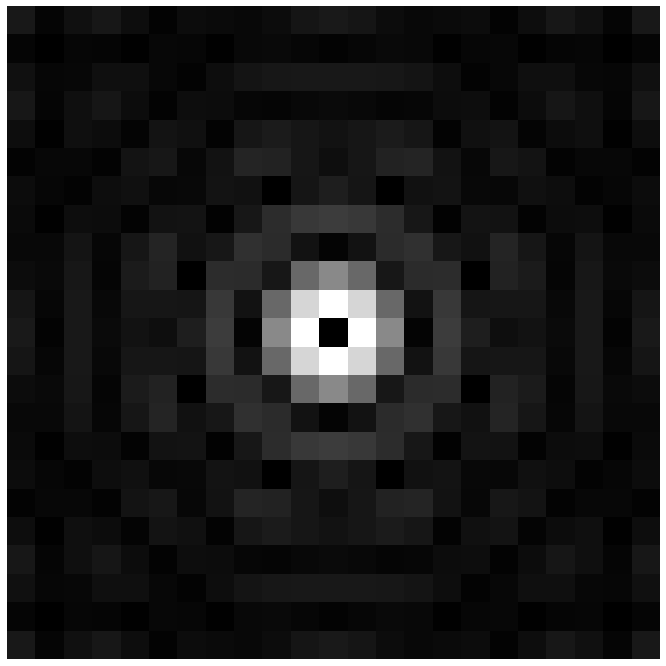

In [15]:
img_disco_freq = np.fft.fft2(img_disco)

display_mag_freq(img_disco_freq)

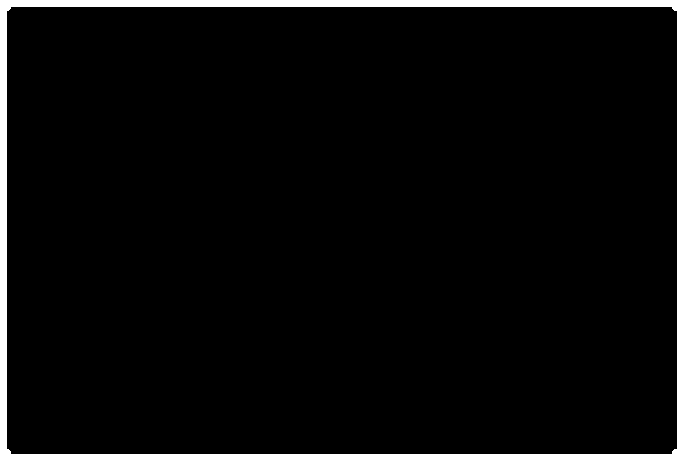

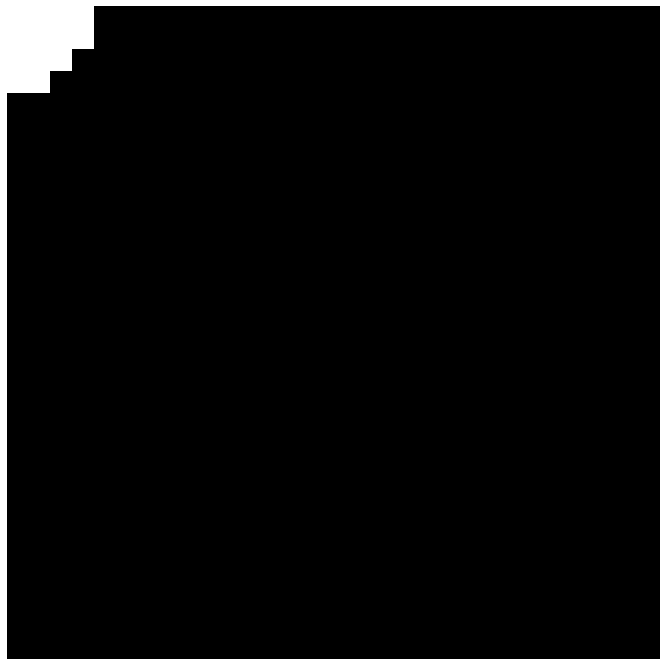

In [16]:
# Zero-padding para ficar compatível com o tamanho da imagem original.
rows, cols = img_test.shape
rows_disco, cols_disco = img_disco.shape

row_anchor = (rows - rows_disco) // 2
col_anchor = (cols - cols_disco) // 2

img_disco_pad = np.zeros(img_test.shape)
img_disco_pad[row_anchor:(row_anchor + rows_disco), col_anchor:(col_anchor + cols_disco)] = img_disco
img_disco_pad = np.fft.fftshift(img_disco_pad)

plt.figure(figsize=(12,12))
plt.imshow(img_disco_pad, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(12,12))
plt.imshow(img_disco_pad[:30, :30], cmap='gray')
plt.axis('off')
plt.show()

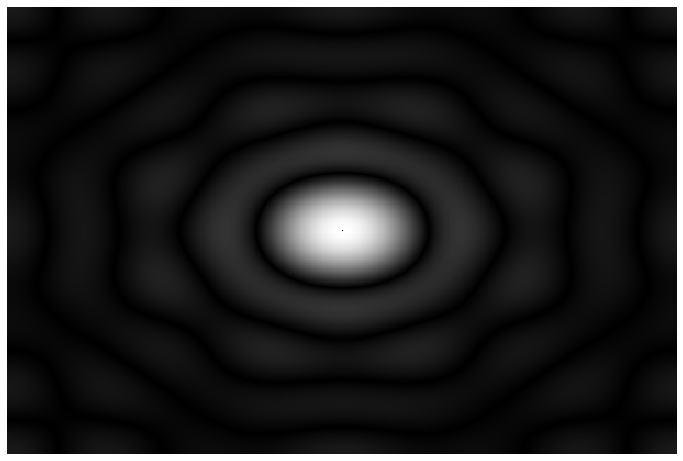

In [17]:
img_disco_freq = np.fft.fft2(img_disco_pad)

display_mag_freq(img_disco_freq)

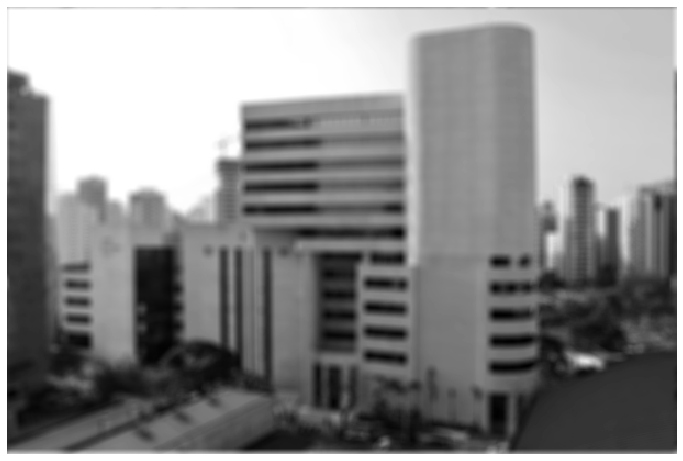

In [18]:
# Agora podemos trabalhar no domínio da frequência:
img_test_blur_fft_freq = img_disco_freq * img_test_freq

# Voltando para o domínio do espaço.
img_test_blur_fft = np.fft.ifft2(img_test_blur_fft_freq).real

plt.figure(figsize=(12,12))
plt.imshow(img_test_blur_fft, cmap='gray')
plt.axis('off')
plt.show()

Compare com a imagem borrada diretamente por convolução. 

Atividade: Explique o que aconteceu com as bordas dessa imagem resultante!

**R:**

## Deblurring com filtro inverso

Vimos que podemos modelar o processo de borramento como um produto na frequência:

$$g[i,j] = h[i,j] * f[i,j] \Leftrightarrow G(u,v) = H(u,v) \cdot F(u,v)$$

E se temos apenas a imagem borrada, conhecemos *exatamente* o kernel de borramento, e queremos reverter esse borramento? Podemos tentar aplicar o processo reverso: 

$$G(u,v) = H(u,v) \cdot F(u,v) \Leftrightarrow F(u,v) = \left(\frac{1}{H(u,v)}\right) G(u,v)$$

Vamos tentar:

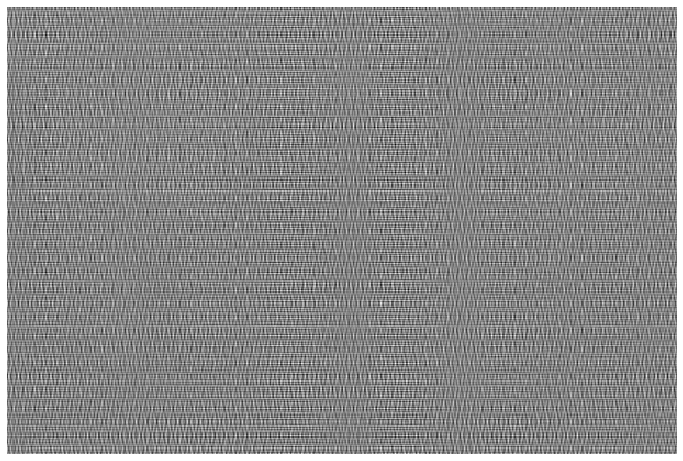

In [19]:
img_test_blur_freq = np.fft.fft2(img_test_blur)

img_test_blur_recon_freq = img_test_blur_freq / img_disco_freq
img_test_blur_recon = np.fft.ifft2(img_test_blur_recon_freq).real

plt.figure(figsize=(12,12))
plt.imshow(img_test_blur_recon, cmap='gray')
plt.axis('off')
plt.show()

Deu ruim! Geralmente divisão é um problema em cálculo numérico, qualquer valor baixo de $|H(u,v)|$ leva a um valor estratosférico de $|H(u,v)|^{-1}$, o que causa essa instabilidade numérica toda.

## Deblurring por Filtro de Wiener

Antes de prosseguir, veja o que acontece com o filtro inverso aplicado à imagem borrada *POR PRODUTO NA FREQUÊNCIA*:

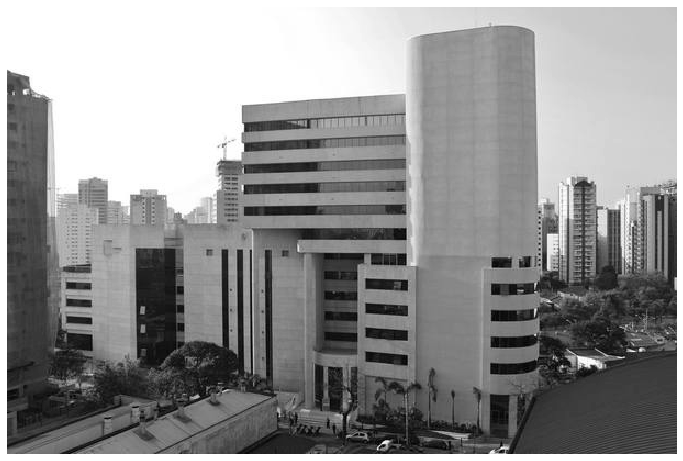

In [20]:
img_test_blur_recon_fft_freq = img_test_blur_fft_freq / img_disco_freq
img_test_blur_recon_fft = np.fft.ifft2(img_test_blur_recon_fft_freq).real

plt.figure(figsize=(12,12))
plt.imshow(img_test_blur_recon_fft, cmap='gray')
plt.axis('off')
plt.show()

Perfeito! O que aconteceu entre este caso e o anterior?

No caso atual, a imagem ``img_test_blur_fft_freq`` foi calculada **exatamente** pelo produto de ``img_disco_freq`` e ``img_test_freq``. Nossa reconstrução por filtro inverso desfez com precisão esse produto, e por isso a imagem reconstruida ficou tão boa. Trapaça pura!

No caso da aplicação do filtro inverso à imagem borrada original ``img_test_blur``, calculamos a transformada de Fourier dela (imagem ``img_test_blur_freq``) e aplicamos o filtro inverso. As imagens ``img_test_blur_freq`` e ``img_test_blur_fft_freq`` não são exatamente iguais. Essa pequena diferença é amplificada pelo filtro inverso, gerando o resultado ruim visto anteriormente.

Em geral, podemos modelar essas incertezas na imagem borrada através de uma componente de ruído (aquela casa da mãe Joana onde cabe sempre mais um):

$$g[i,j] = h[i,j]*f[i,j] + \eta[i,j]$$

Em termos de transformada de Fourier, temos:

$$G(u,v) = H(u,v) \cdot F(u,v) + N(u,v)$$

onde $N(u,v) = \mathcal{F}\{\eta[i,j]\}$. Ao aplicar o filtro inverso, temos:

$$\hat{F}(u,v) = G(u,v) + \frac{N(u,v)}{H(u,v)}$$

Portanto quando $|H(u,v)|$ é baixo, o ruído ganha um belo *boost*!

Se soubéssemos pelo menos o valor da magnitude de $N(u,v)$, poderíamos tentar diminuir o efeito do filtro inverso onde $N(u,v)$ é alto em relação a $H(u,v)$.

Na prática não conhecemos nem $h(x,y)$ (e consequentemente $H(u,v)$), nem $\eta(x,y)$ (e consequentemente $N(u,v)$)... 

Eis que vem a solução: ***GAMBIARRA***!

- Chuta um tipo de $h[i,j]$ razoável para o fenômeno de borramento em questão. Por exemplo, para falta de foco chuta que $h[i,j]$ é um disco. 
- E qual o raio do disco?
    - Chuta!
    - Tenta ver se tem alguma dica do raio do disco observando cuidadosamente a imagem borrada. Por exemplo, se tiver uma manchinha num lugar onde você acha que deveria ter um pontinho puro e isolado, você achou $h[i,j]$!
    - Testa vários raios e vê qual fica melhor!
- E quanto ao ruído?
    - Chuta que é ruido branco: aquele ruido que existe de modo igual em todas as frequências. Ou seja: chuta $N(u,v) = K$
- Qual o valor de $K$? 
    - 3, 2, 1... CHUTA!
    - Tenta ver se tem uma região da imagem borrada que deveria ser uniforme. A variância dos pixels nessa região é uma estimativa de $K$.
    
Dentro dessas gamb... er... hipóteses... podemos construir o filtro de Wiener (Norbert Wiener, 1940). Uma versão desse filtro com nossas hipóteses é:

$$\hat{F}(u,v) = \left(\frac{1}{H(u,v)}\right)\left(\frac{|H(u,v)|^2}{|H(u,v)|^2 + K}\right)G(u,v)$$

Podemos simplificar o filtro um pouco:

$$\hat{F}(u,v) = \left(\frac{H(u,v)^*}{|H(u,v)|^2 + K}\right)G(u,v)$$

Vamos testar:

In [21]:
def wiener(G, H, K):
    W = H.conj() / (np.abs(H)**2 + K)
    F = W*G
    return F

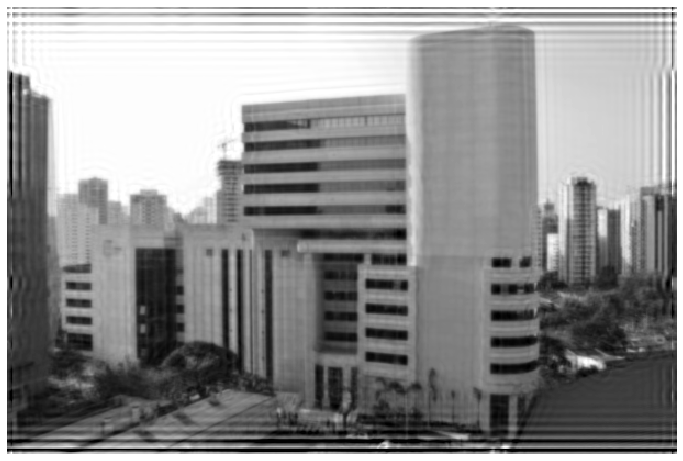

In [22]:
# Chuta o K.
K = 0.01

# Chuta o h
h = make_disk(img_test_blur.shape, 5)
H = np.fft.fft2(h)

# Filtra.
G = np.fft.fft2(img_test_blur)
img_test_blur_recon_wiener_freq = wiener(G, H, K)
img_test_blur_recon_wiener = np.fft.fftshift(np.fft.ifft2(img_test_blur_recon_wiener_freq).real)

plt.figure(figsize=(12,12))
plt.imshow(np.clip(img_test_blur_recon_wiener, 0, 1), cmap='gray')
plt.axis('off')
plt.show()

Melhorou!

**Atividade**: Agora é com você: o que está escrito naquela imagem lá do começo? Boa sorte!

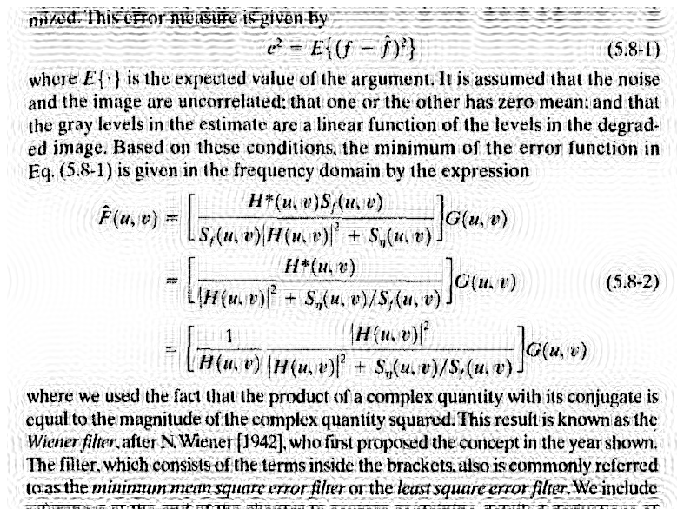

In [23]:
# Chuta o K.
K = 0.001

# Chuta o h
h = make_disk(img_blur.shape, 5)
H = np.fft.fft2(h)

# Filtra.
G = np.fft.fft2(img_blur)
img_test_blur_recon_wiener_freq = wiener(G, H, K)
img_test_blur_recon_wiener = np.fft.fftshift(np.fft.ifft2(img_test_blur_recon_wiener_freq).real)

plt.figure(figsize=(12,12))
plt.imshow(np.clip(img_test_blur_recon_wiener, 0, 1), cmap='gray')
plt.axis('off')
plt.show()